In [ ]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
sp = yf.download('SNP', start='1950-01-01', end='2022-01-13')

[*********************100%***********************]  1 of 1 completed


In [ ]:
sp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-10-18,15.865385,16.057692,15.865385,15.961538,5.704567,15145260
2000-10-19,15.384615,15.576923,14.807692,15.528846,5.549923,1434680
2000-10-20,15.480769,15.673077,15.384615,15.384615,5.498376,263120
2000-10-23,15.096154,15.096154,14.278846,14.903846,5.326550,615940
2000-10-24,14.615385,14.759615,14.326923,14.423077,5.154727,674310
...,...,...,...,...,...,...
2022-01-06,49.099998,49.480000,49.000000,49.459999,49.459999,107900
2022-01-07,49.599998,50.279999,49.599998,50.220001,50.220001,123400
2022-01-10,49.810001,49.950001,49.259998,49.299999,49.299999,81700


In [ ]:
sp = sp.drop(["Open",	"High",	"Low",	"Adj Close",	"Volume"], axis = 1)
sp

,Close
Date,
2000-10-18,15.961538
2000-10-19,15.528846
2000-10-20,15.384615
2000-10-23,14.903846
2000-10-24,14.423077
...,...
2022-01-06,49.459999
2022-01-07,50.220001
2022-01-10,49.299999


In [ ]:
# importing the dickey fuller test from stats models

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# defining the adf test for my data, and telling the function to print the DF stat, p and critical values, and using a for loop for the 4th result
# indicating the unit (%) and the number of decimal places:

In [ ]:
def adf_test(sp):
    result = adfuller(sp.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [ ]:
print('ADF Test: S&P 500 time series')
adf_test(sp['Close'])

ADF Test: S&P 500 time series
ADF Statistics: -2.167108
p-value: 0.218399
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
# p value too big for the null to be disproven, that is here we see that the series is non-stationary, I've therefore applied first differencing:

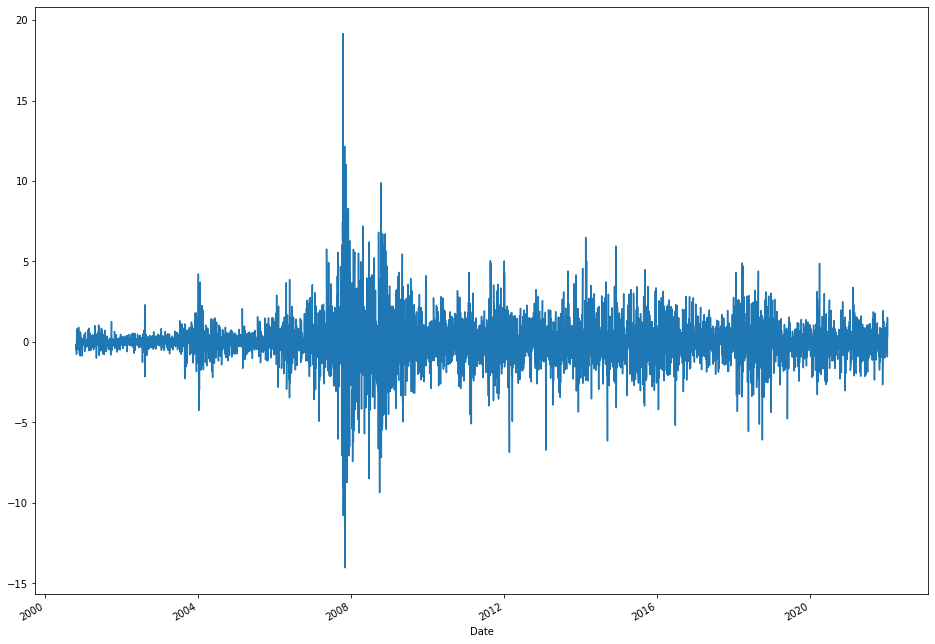

In [ ]:
sp['first diff'] = sp['Close'] - sp['Close'].shift()  
sp['first diff'].plot(figsize=(16, 12))

In [ ]:
sp = sp.dropna()

In [ ]:
# after which the data appears stationary according to the df test:

In [ ]:
print('ADF Test: S&P 500 time series')
adf_test(sp['first diff'])

ADF Test: S&P 500 time series
ADF Statistics: -18.045603
p-value: 0.000000
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
# this series now appears to show a central tendency of 0 and has no trend over time, and variance independent of time.
# the p value being so small indicated that the series now satisfies stationarity according to the Dickey Fuller test.

In [ ]:
# Sources: How to download S&P 500 data from Yahoo Finance using Python (Trader Court), A Quick Introduction On Granger Causality Testing For Time Series Analysis (Susan Li)

In [ ]:
sp

,Close,first diff
Date,,
2000-10-19,15.528846,-0.432693
2000-10-20,15.384615,-0.144231
2000-10-23,14.903846,-0.480769
2000-10-24,14.423077,-0.480769
2000-10-25,13.653846,-0.769231
...,...,...
2022-01-06,49.459999,0.730000
2022-01-07,50.220001,0.760002
2022-01-10,49.299999,-0.920002


In [ ]:
#from google.colab import files

In [ ]:
#sp.to_csv("stationary_sp.csv")

In [ ]:
#files.download("stationary_sp.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>